<a href="https://colab.research.google.com/github/muscak/Simple-Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression: Bank Campaing

Create a logistic regression using Scikit Learn libraries based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

##Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sb
sb.set(style="whitegrid")

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

In [2]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

Mounted at /content/gdrive


##Load Raw Data

In [4]:
# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Logistic Regression/Data/Bank_data.csv')
df.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [6]:
# Dropping the first columns as it's the index
df = df.drop(['Unnamed: 0'], axis='columns')
df.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [7]:
df.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


As it can be seen on the above table we the max 'duration' is 2653 which could be an outlier. Also when you check the min and max values of other predictors, 'duration' is much higher then the others. This means that the data requires some preprocessing.

##Data Preprocessing

###Checking NULL Observations

In [22]:
df.isnull().sum()

interest_rate    0
credit           0
march            0
may              0
previous         0
duration         0
y                0
dtype: int64

###Checking for Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


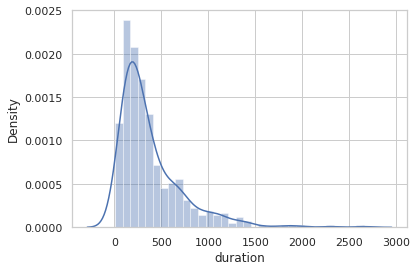

In [23]:
sb.distplot(df['duration'])

In [24]:
q = df['duration'].quantile(0.99)
data_1 = df[df['duration'] < q]
data_1.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,2.826939,0.035156,0.263672,0.392578,0.128906,362.833984,0.494141
std,1.877673,0.184355,0.441054,0.818203,0.335424,293.495930,0.500455
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.039750,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000
50%,1.453000,0.000000,0.000000,0.000000,0.000000,264.500000,0.000000
75%,4.955500,0.000000,1.000000,0.250000,0.000000,476.250000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,1447.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


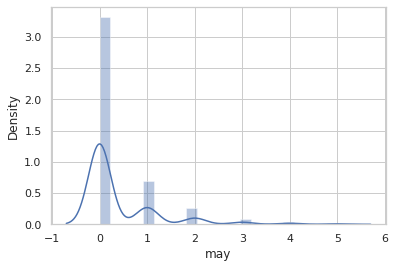

In [25]:
sb.distplot(df['may'])

In [26]:
q = data_1['may'].quantile(0.99)
data_2 = data_1[data_1['may'] < q]
data_2.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,2.855186,0.033663,0.263366,0.338614,0.118812,362.968317,0.487129
std,1.875073,0.180540,0.440896,0.680069,0.323888,294.876600,0.500330
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.050000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000
50%,1.498000,0.000000,0.000000,0.000000,0.000000,264.000000,0.000000
75%,4.957000,0.000000,1.000000,0.000000,0.000000,477.000000,1.000000
max,4.970000,1.000000,1.000000,3.000000,1.000000,1447.000000,1.000000


In [9]:
# Map the 'y' columns
data_2['y'] = data_2['y'].map({'yes': 1, 'no': 0}) 
data_2.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [27]:
data = data_2.copy()

In [28]:
y = data['y']
x = data.drop(['y'], axis='columns')

###Scaling the data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

##Logistic Regression

Logistic Regressions are non-linear by definition. It predicts the probability of an event occurring.

###$\frac{p(X)}{1 - p(X)} = e^{(\beta_0 + \beta_1x_1 + ... + \beta_kx_k)}$

In [38]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [39]:
y_hat = log_reg.predict(x)

In [57]:
# Check the accuracy score of the training
score = log_reg.score(x, y)
print('Accuracy Score: {:0.2f}%'.format(score*100))

Accuracy Score: 86.73%


In [41]:
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_hat)

# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,218,41
Actual 1,26,220


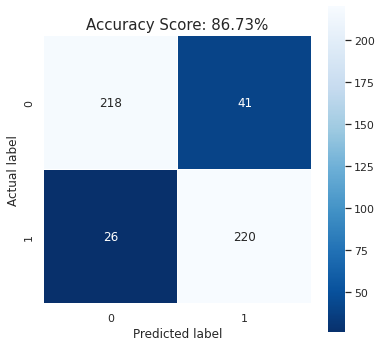

In [58]:
# Display the confusion matrix in a better way
plt.figure(figsize=(6,6))
sb.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:0.2f}%'.format(score*100)
plt.title(all_sample_title, size = 15);

##Testing the Model

In [46]:
#Load testing data
df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Logistic Regression/Data/Bank_data_testing.csv')
df_test.describe(include='all')

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,110.500000,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,NaN
std,64.230055,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,NaN
min,0.000000,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN
25%,55.250000,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,NaN
50%,110.500000,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,NaN
75%,165.750000,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,NaN


In [47]:
df_test = df_test.drop('Unnamed: 0', axis='columns')
df_test['y'] = df_test['y'].map({'yes': 1, 'no': 0})
x_test = df_test.drop(['y'], axis='columns')
y_test = df_test['y']
x_test_scaled = scaler.transform(x_test) # We'll not call .fit not to cause any data leakage

In [48]:
y_hat_test = log_reg.predict(x_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [55]:
test_score = log_reg.score(x_test_scaled, y_test)
print('Accuracy Score: {:0.2f}%'.format(test_score*100))

Accuracy Score: 72.07%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


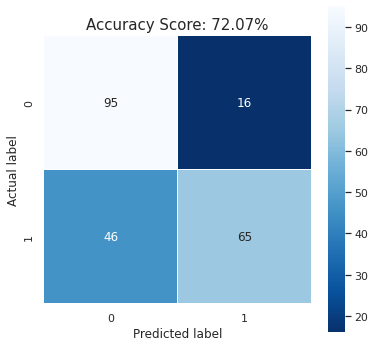

In [56]:
cm_test = metrics.confusion_matrix(y_test, y_hat_test)

plt.figure(figsize=(6,6))
sb.heatmap(cm_test, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:0.2f}%'.format(test_score*100)
plt.title(all_sample_title, size = 15);

Training Accuracy Score: 86.73%<br>
Test Accuracy Score: 72.07%

Obviously the model is suffering from overfitting. For further improvement:
- Multicollinearity can be checked and the features which are interrelated can be removed.
- 'credit', 'march', 'may' and 'previous' columns seems categorical features. They can be removed from the scaling and threaded as categorical parameters.
- Training and test datasets can be checked if they are balanced.